In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# Load and transform the data by reformatting date values
df = pd.read_csv("resources/data/airlines/airlines.csv")
df.dropna(inplace=True)
df["Time.Label"] = [ datetime.strptime(x, "%Y/%m") for x in df["Time.Label"] ]
df.set_index("Time.Label", drop=False, inplace=True)

print("Dimensionality: {}".format(df.shape))
print(df.head())
print(df.info())

Dimensionality: (4408, 24)
           Airport.Code                                       Airport.Name  \
Time.Label                                                                   
2003-06-01          ATL  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...   
2003-06-01          BOS                    Boston, MA: Logan International   
2003-06-01          BWI  Baltimore, MD: Baltimore/Washington Internatio...   
2003-06-01          CLT     Charlotte, NC: Charlotte Douglas International   
2003-06-01          DCA  Washington, DC: Ronald Reagan Washington National   

           Time.Label  Time.Month Time.Month Name  Time.Year  \
Time.Label                                                     
2003-06-01 2003-06-01           6            June       2003   
2003-06-01 2003-06-01           6            June       2003   
2003-06-01 2003-06-01           6            June       2003   
2003-06-01 2003-06-01           6            June       2003   
2003-06-01 2003-06-01           6         

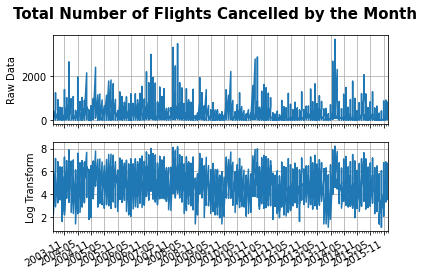

In [3]:
# Plot the data and examine transformations to achieve stationarity
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot("Time.Label", "Statistics.Flights.Cancelled", data=df)
ax1.set_ylabel("Raw Data")

# Perform a Log transformation

df["Log Statistics.Flights.Cancelled"] = [ np.log(x) for x in df["Statistics.Flights.Cancelled"] ]
ax2.plot("Time.Label", "Log Statistics.Flights.Cancelled", data=df)
ax2.set_ylabel("Log Transform")

# Major ticks every 6 months.

fmt_half_year = mdates.MonthLocator(interval=6)
ax1.xaxis.set_major_locator(fmt_half_year)
ax2.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.

fmt_month = mdates.MonthLocator()
ax1.xaxis.set_minor_locator(fmt_month)
ax2.xaxis.set_minor_locator(fmt_month)

# Set the min and max date range on the X-axis

datemin = datetime.strptime("2003/06","%Y/%m")
datemax = datetime.strptime("2016/01", "%Y/%m")
ax1.set_xlim(datemin, datemax)
ax2.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.

ax1.format_xdata = mdates.DateFormatter("%Y-%m")
ax1.format_ydata = lambda x: f"{x:.2f}"
ax1.grid(True)
ax2.format_xdata = mdates.DateFormatter("%Y-%m")
ax2.format_ydata = lambda x: f"{x:.2f}"
ax2.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.

fig.autofmt_xdate()
fig.suptitle("Total Number of Flights Cancelled by the Month", fontsize=15, fontweight='bold')

plt.show()